In [0]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2019-05-28 15:54:23--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 92.122.255.148, 2a02:26f0:120:391::e59, 2a02:26f0:120:3ab::e59
Connecting to download.microsoft.com (download.microsoft.com)|92.122.255.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  17.3MB/s    in 30s     

2019-05-28 15:54:53 (26.4 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [0]:
!unzip kagglecatsanddogs_3367a.zip

Archive:  kagglecatsanddogs_3367a.zip
   creating: PetImages/Cat/
  inflating: PetImages/Cat/0.jpg     
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/10001.jpg  
  inflating: PetImages/Cat/10002.jpg  
  inflating: PetImages/Cat/10003.jpg  
  inflating: PetImages/Cat/10004.jpg  
  inflating: PetImages/Cat/10005.jpg  
  inflating: PetImages/Cat/10006.jpg  
  inflating: PetImages/Cat/10007.jpg  
  inflating: PetImages/Cat/10008.jpg  
  inflating: PetImages/Cat/10009.jpg  
  inflating: PetImages/Cat/1001.jpg  
  inflating: PetImages/Cat/10010.jpg  
  inflating: PetImages/Cat/10011.jpg  
  inflating: PetImages/Cat/10012.jpg  
  inflating: PetImages/Cat/10013.jpg  
  inflating: PetImages/Cat/10014.jpg  
  inflating: PetImages/Cat/10015.jpg  
  inflating: PetImages/Cat/10016.jpg  
  inflating: PetImages/Cat/10017.jpg  
  in

In [0]:
!ls -la

total 64
drwxr-xr-x 1 root root  4096 May 28 16:11  .
drwxr-xr-x 1 root root  4096 May 28 13:28  ..
drwxr-xr-x 1 root root  4096 May 23 16:08  .config
drwxr-xr-x 2 root root  4096 May 28 13:38  .kaggle
-rw-r--r-- 1 root root 35545 Feb 10  2017 'MSR-LA - 3467.docx'
drwxr-xr-x 4 root root  4096 May 28 16:07  PetImages
-rw-r--r-- 1 root root   104 Feb 10  2017 'readme[1].txt'
drwxr-xr-x 1 root root  4096 May 22 16:22  sample_data


## **Data Preprocessing**


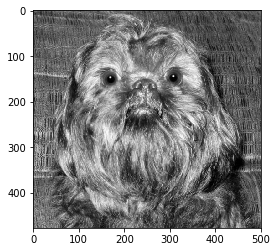

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os, cv2

DATADIR = '/content/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break
    break

In [0]:
# Since the images are in different shapes, we need to normalize them
print(img_array.shape)

(478, 500)


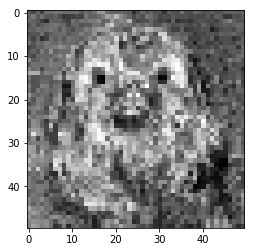

In [0]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()


In [0]:
len(training_data)

24946

In [0]:
import random

random.shuffle(training_data)

In [0]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
1
0
0
0
0


In [0]:
X = []
y = []

In [0]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Building a Convolutional Neural Network to classify our images

In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [0]:
X = 